**Importações**

In [1]:
import numpy as np
import pandas as pd
from scipy import special
import itertools
from datetime import timedelta
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Lendo os arquivos e procurando inconsistências**

In [2]:
fraude_df = pd.read_csv('/content/Fraud_Data.csv')
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
fraude_df.dtypes

id                  int64
cadastro           object
compra             object
valor               int64
id_dispositivo     object
fonte              object
browser            object
genero             object
idade               int64
ip                float64
fraude              int64
dtype: object

In [4]:
for col in fraude_df:
  print('Total de valores nulos na coluna {}: {}'.format(col,fraude_df[col].isnull().sum()))

Total de valores nulos na coluna id: 0
Total de valores nulos na coluna cadastro: 0
Total de valores nulos na coluna compra: 0
Total de valores nulos na coluna valor: 0
Total de valores nulos na coluna id_dispositivo: 0
Total de valores nulos na coluna fonte: 0
Total de valores nulos na coluna browser: 0
Total de valores nulos na coluna genero: 0
Total de valores nulos na coluna idade: 0
Total de valores nulos na coluna ip: 0
Total de valores nulos na coluna fraude: 0


In [5]:
ips_df = pd.read_csv('/content/IpAddress_to_Country.csv')
ips_df.head()

,limite_inferior_ip,limite_superior_ip,pais
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
for col in ips_df:
  print('Total de valores nulos na coluna {}: {}'.format(col,ips_df[col].isnull().sum()))

Total de valores nulos na coluna limite_inferior_ip: 0
Total de valores nulos na coluna limite_superior_ip: 0
Total de valores nulos na coluna pais: 0


In [7]:
ips_df.dtypes

limite_inferior_ip    float64
limite_superior_ip      int64
pais                   object
dtype: object

Investigando o fato do limite inferior ser do tipo float e fazendo o casting para int


In [8]:
ips_floats = ips_df['limite_inferior_ip'].apply(lambda x: not x.is_integer()).sum()
print('Número de limites inferiores de endereços de ip com decimal não zero: {}'.format(ips_floats))

Número de limites inferiores de endereços de ip com decimal não zero: 0


In [9]:
ips_df['limite_inferior_ip'] = ips_df['limite_inferior_ip'].astype(int)

Verificando se o ip fornecido esta dentro dos limites e criando a coluna pais no dataframe

In [10]:
def ip_pais(ip):
  paises = ips_df[(ips_df['limite_inferior_ip'] <= ip) & (ips_df['limite_superior_ip'] >= ip)].pais
  if paises.shape[0] == 1:
    return paises.iloc[0]
  else:
    return print('Erro')

In [11]:
fraude_df['pais'] = fraude_df['ip'].apply(ip_pais)

A saída de streaming foi truncada nas últimas 5000 linhas.
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
Erro
E

In [12]:
fraude_df.to_csv('dados_fraude_com_pais', index = False)

In [121]:
fraude_df = pd.read_csv('/content/dados_fraude_com_pais')
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


**Análise exploratória**

Relação entre o sexo e a fraude

Text(0, 0.5, 'Casos')

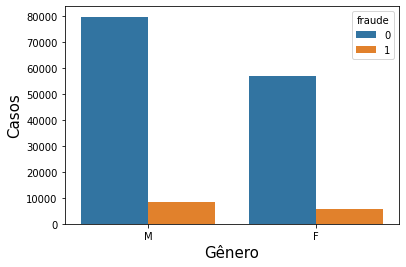

In [122]:
sns.countplot(x = 'genero',hue = 'fraude', data = fraude_df)
plt.xlabel('Gênero', fontsize = 15)
plt.ylabel('Casos', fontsize = 15)

Relação entre o valor de compra e a fraude

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Valor de compra')

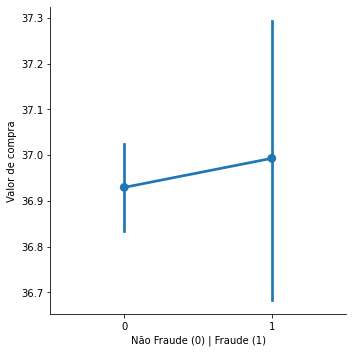

In [123]:
sns.factorplot(x = 'fraude', y = 'valor', data = fraude_df)
plt.xlabel('Não Fraude (0) | Fraude (1)', fontsize = 10)
plt.ylabel('Valor de compra', fontsize = 10)

Relação de idade e fraude

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.825000000000003, 0.5, 'Idade')

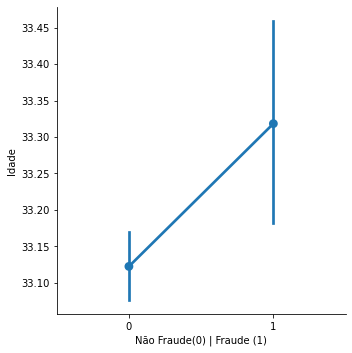

In [124]:
sns.factorplot(x = 'fraude', y = 'idade', data = fraude_df)
plt.xlabel('Não Fraude(0) | Fraude (1)', fontsize = 10)
plt.ylabel('Idade', fontsize = 10)

Relação da fonte de marketing com a fraude

Text(0, 0.5, 'Contagem')

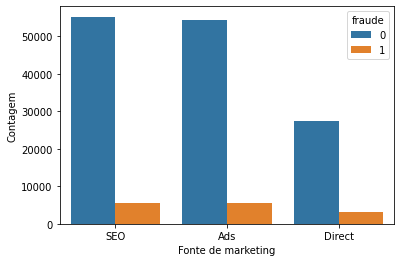

In [125]:
sns.countplot(x = 'fonte', hue = 'fraude', data = fraude_df)
plt.xlabel('Fonte de marketing', fontsize = 10)
plt.ylabel('Contagem', fontsize = 10)

Explorando os países

In [126]:
sum_fraude = fraude_df[fraude_df.fraude == 1]['fraude'].groupby(fraude_df.pais).sum()
sum_fraude = sum_fraude.reset_index()
sum_nao_fraude = fraude_df[fraude_df.fraude == 0]['fraude'].groupby(fraude_df.pais).sum()
sum_nao_fraude = sum_nao_fraude.reset_index()
sum_nao_fraude

,pais,fraude
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,0
...,...,...
175,Viet Nam,0
176,Virgin Islands (U.S.),0
177,Yemen,0
178,Zambia,0


In [127]:
sum_fraude.sort_values(by = 'fraude', inplace = True)

Text(0, 0.5, 'Paises')

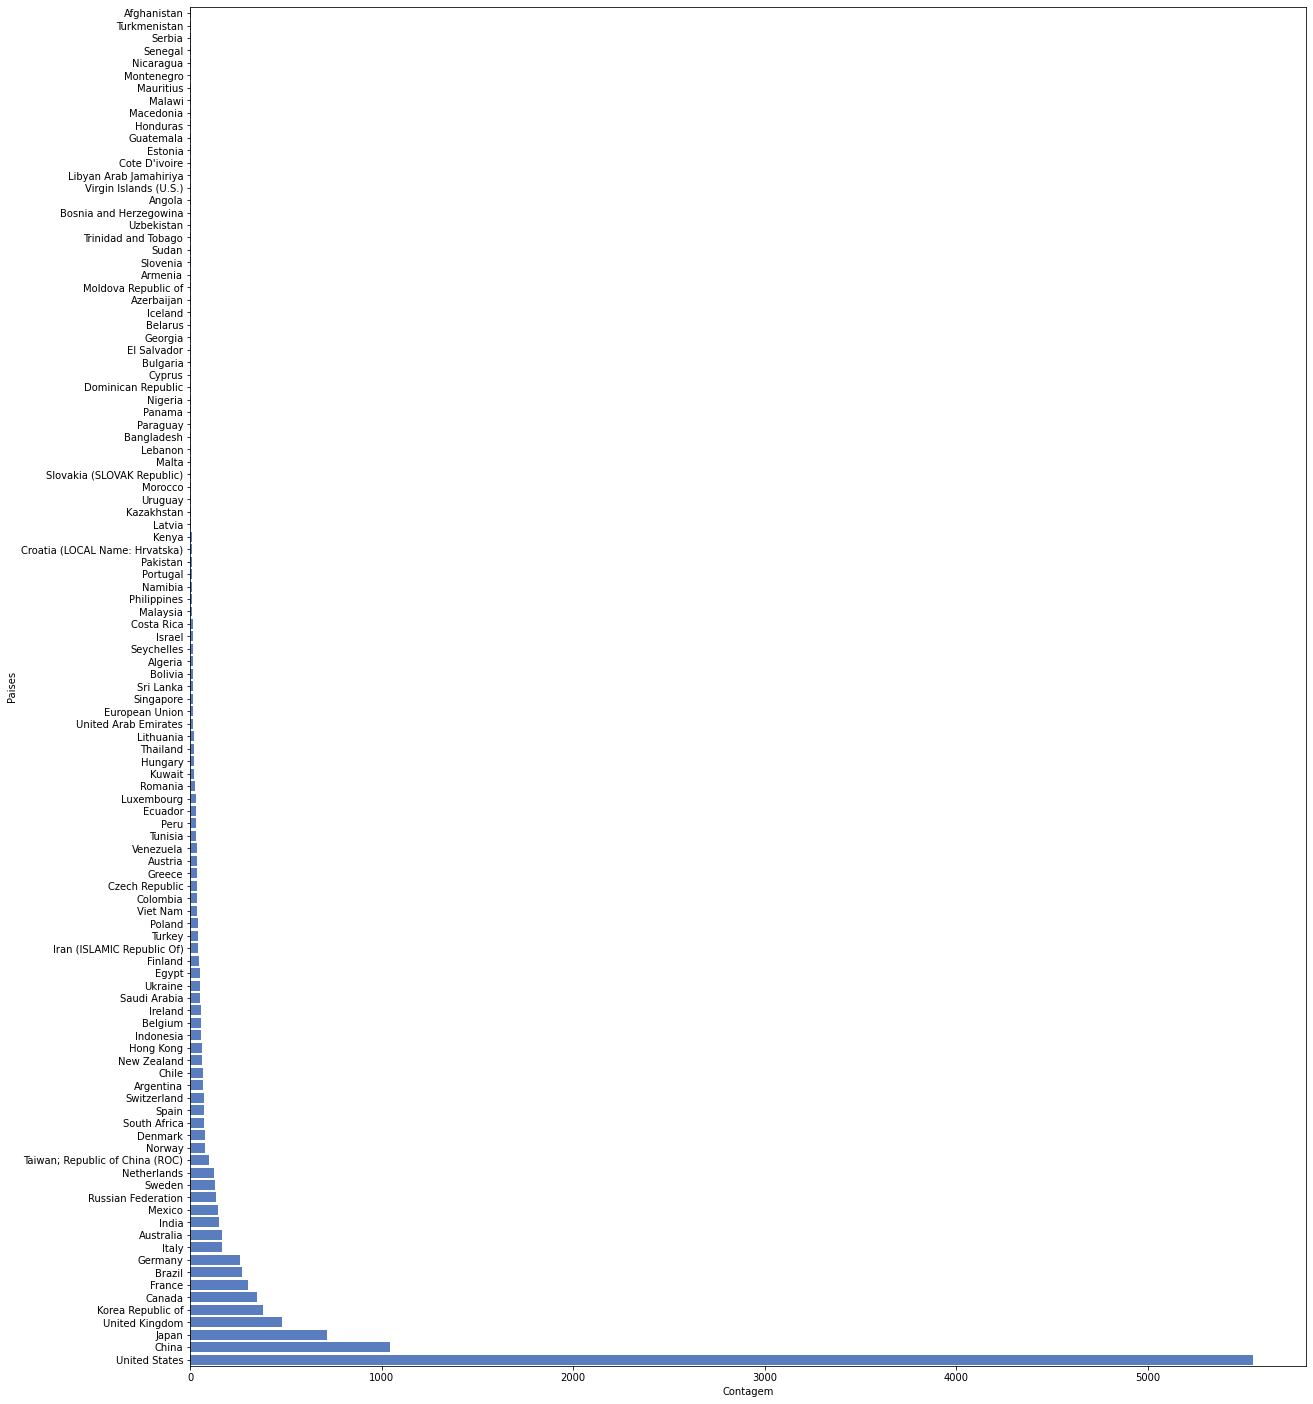

In [128]:
f, x = plt.subplots(figsize = (20,25))
sns.set_color_codes('muted')
sns.barplot(x = 'fraude',y = 'pais',data = sum_fraude, label = 'Total', color = 'b')
plt.xlabel('Contagem', fontsize = 10)
plt.ylabel('Paises', fontsize = 10)

Analisando a relação entre o número de ID'S por dispositivos e por ip com as fraudes


In [129]:
count_id = fraude_df.groupby('id_dispositivo').id.count()
fraude_df['id_por_dispositivo'] = fraude_df.id_dispositivo.apply(lambda x: count_id[x])

count_id_ip = fraude_df.groupby('ip').id.count()
fraude_df['id_por_ip'] = fraude_df.ip.apply(lambda x: count_id_ip[x])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(16.299999999999997, 0.5, 'ID de usuário por endereço IP')

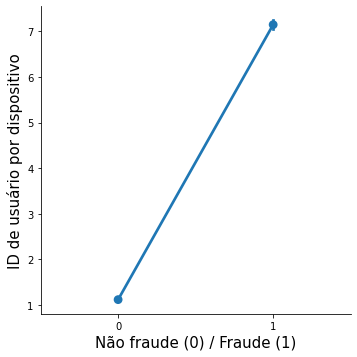

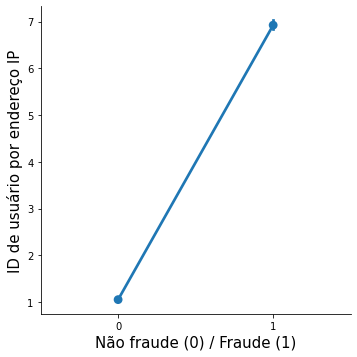

In [130]:
sns.factorplot(x="fraude", y="id_por_dispositivo", data=fraude_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por dispositivo", fontsize=15)

sns.factorplot(x="fraude", y="id_por_ip", data=fraude_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por endereço IP", fontsize=15)

É possível ver uma relação entre a quantidade de ip's e dipositivos associados a um mesmo id, com um aumento nos casos de fraude 

Verificando a relação entre o tempo de cadastro e compra com os casos de fraude 

In [131]:
fraude_df['cadastro'] = fraude_df.cadastro.apply(pd.to_datetime)
fraude_df['compra'] = fraude_df.compra.apply(pd.to_datetime)

fraude_df['tempo_entre_cadastro_compra'] = (fraude_df['compra'] - fraude_df['cadastro']).apply(lambda x: x.seconds)

In [132]:
pais_dummies = pd.get_dummies(fraude_df.pais, prefix = 'pais')
fraude_df = pd.concat([fraude_df,pais_dummies], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.825000000000003, 0.5, 'Tempo entre o inicio e a compra (segundos)')

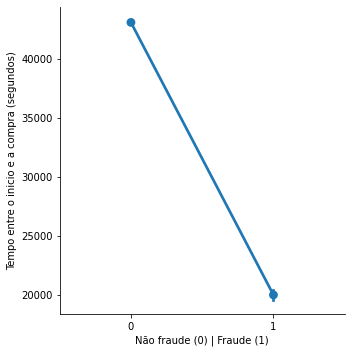

In [133]:
sns.factorplot(x = 'fraude', y= 'tempo_entre_cadastro_compra', data = fraude_df)
plt.xlabel('Não fraude (0) | Fraude (1)', fontsize = 10)
plt.ylabel('Tempo entre o inicio e a compra (segundos)', fontsize = 10)

É possível ver uma relação entre o intervalo de tempo da realização do cadastro e a compra, com os casos de fraude

Vendo a relação entre as datas das compras e a fraude

Text(0, 0.5, 'Contagem')

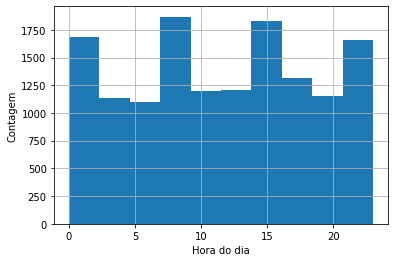

In [134]:
fraude_df[fraude_df.fraude == 1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel('Hora do dia', fontsize = 10)
plt.ylabel('Contagem', fontsize = 10)

Text(0, 0.5, 'Contagem')

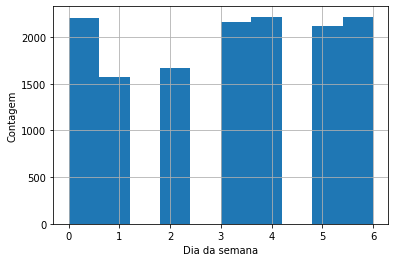

In [135]:
fraude_df[fraude_df.fraude == 1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel('Dia da semana', fontsize = 10)
plt.ylabel('Contagem', fontsize = 10)

Text(0, 0.5, 'Contagem')

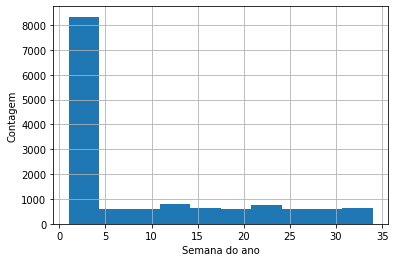

In [136]:
fraude_df[fraude_df.fraude == 1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel('Semana do ano', fontsize = 10)
plt.ylabel('Contagem', fontsize = 10)

É possível perceber que existe um pico de casos de fraude no começo do ano,porém são datas que consequentemente tem mais gastos

Criando uma media do id por dispositivo e do id por ip 

In [137]:
fraude_df['media_id'] = (fraude_df['id_por_dispositivo'] + fraude_df['id_por_ip']) * 0.5
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,tempo_entre_cadastro_compra,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,pais_Brazil,...,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0


Modificando a coluna pais e excluindo colunas que não se mostraram relevantes 

In [138]:
fraude_df['media_id'] = (fraude_df['id_por_dispositivo'] + fraude_df['id_por_ip']) * 0.5
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,tempo_entre_cadastro_compra,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,pais_Brazil,...,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0


In [139]:
fraude_df.drop(columns = ['id','cadastro', 'compra','id_dispositivo','ip','id_por_dispositivo','id_por_ip','pais','fonte','browser','genero','idade','valor'], inplace = True )

In [140]:
fraude_df.head()

,fraude,tempo_entre_cadastro_compra,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,pais_Brazil,pais_British Indian Ocean Territory,pais_Brunei Darussalam,pais_Bulgaria,pais_Burkina Faso,pais_Burundi,pais_Cambodia,pais_Cameroon,pais_Canada,pais_Cape Verde,pais_Cayman Islands,pais_Chile,pais_China,pais_Colombia,...,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe,media_id
0,0,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.0
3,0,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,0,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0


Vendo graficamente as novas colunas

Text(0, 0.5, 'Contagem')

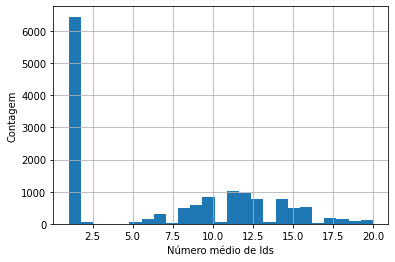

In [141]:
fraude_df[fraude_df['fraude'] == 1]['media_id'].hist(bins = 25)
plt.xlabel('Número médio de Ids', fontsize = 10)
plt.ylabel('Contagem', fontsize = 10)

Text(0, 0.5, 'Contagem')

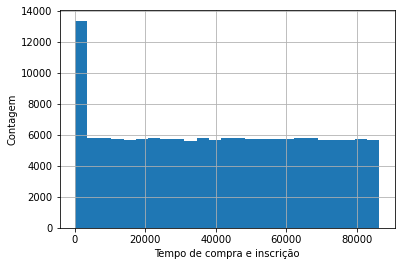

In [142]:
fraude_df['tempo_entre_cadastro_compra'].hist(bins = 25)
plt.xlabel('Tempo de compra e inscrição', fontsize = 10)
plt.ylabel('Contagem', fontsize = 10)

Transformando a distribuição do tempo entre a inscrição e a compra em Gaussiana

In [143]:
def rescale_series(ser,gauss = False):
    ser_min = ser.min() - 1e-5
    ser_max = ser.max() + 1e-5
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    if gauss:
      new_ser = new_ser.apply(lambda x: np.sqrt(2)*special.erfinv(2*x - 1))
    return new_ser

Text(0, 0.5, 'Contagem')

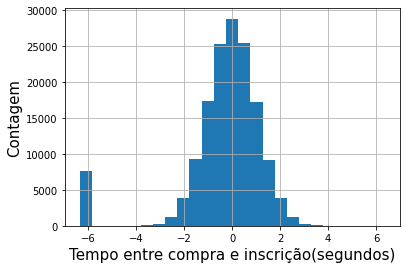

In [144]:
fraude_df["tempo_entre_cadastro_compra"] = rescale_series(fraude_df.tempo_entre_cadastro_compra, gauss = True)
fraude_df.tempo_entre_cadastro_compra.hist(bins=25)
plt.xlabel("Tempo entre compra e inscrição(segundos)", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Identificando as variáveis importantes

In [145]:
onehotencoded = [features for features in fraude_df.columns if 'pais' not in features and features != 'fraude' ]
for col in onehotencoded:
  fraude_df[col] = rescale_series(fraude_df[col])
x = fraude_df[[col for col in fraude_df.columns if col != 'fraude']]
y = fraude_df['fraude']

In [147]:
x.to_csv('X.csv', index = False)
y.to_csv('y.csv', index = False)

In [148]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
_ = clf.fit(x,y)

features = pd.DataFrame()
features['feature'] = x.columns
features['importancia'] = clf.feature_importances_

In [149]:
features[features.importancia > np.mean(features.importancia)].sort_values(by = 'importancia', ascending = False)

,feature,importancia
0,tempo_entre_cadastro_compra,0.697306
182,media_id,0.296890


**Criando modelos preditivos**

In [150]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import f1_score

In [151]:
X_dev, X_eval, Y_dev, Y_eval = train_test_split(x, y, train_size = 0.75, random_state = 23)
Y_dev = Y_dev.apply(lambda x: 1 if x == 0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x == 0 else -1)

In [152]:
IF = IsolationForest(max_samples="auto", contamination = 0.095, random_state=1)
param_grid = {"n_estimators": [100, 150, 200, 250, 300, 350, 400, 450, 500]}

clf = GridSearchCV(IF,
                param_grid,
                cv=5,
                n_jobs=10,
                scoring="f1",
                verbose=10)

_ = clf.fit(X_dev, Y_dev)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

     anomalo       0.49      0.49      0.49      3546
      normal       0.95      0.95      0.95     34232

    accuracy                           0.90     37778
   macro avg       0.72      0.72      0.72     37778
weighted avg       0.90      0.90      0.90     37778

Area sob a curva ROC: {:0, 3f} 0.7179079841648514


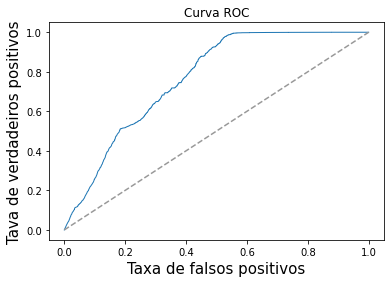

In [153]:
IF_best = clf.best_estimator_
Y_predicted = IF_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print (classification_report(Y_eval,
                Y_predicted,
                target_names=["anomalo","normal"]))
print("Area sob a curva ROC: {:0, 3f}", format(roc_auc))

IF_probs = IF_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, IF_probs)

plt.plot(fpr, tpr, lw=1)

plt.plot([0,1],[0,1], '--', color=(0.6,0.6,0.6), label="sorte")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("Taxa de falsos positivos", fontsize=15)
plt.ylabel("Tava de verdadeiros positivos", fontsize=15)
plt.title("Curva ROC", fontsize=12)

plt.show()

In [154]:
from sklearn.metrics import confusion_matrix
cnf_matrix_IF = confusion_matrix(Y_eval, Y_predicted)
print(cnf_matrix_IF)

[[ 1733  1813]
 [ 1811 32421]]


**Algoritmo não supervisionado**

In [155]:
from random import sample
x["fraude"] = y

X_anomalias = x[x['fraude'] == 1]
X_normal = x[x['fraude'] == 0]

train_idxs = sample(list(X_normal.index), int(0.7*X_normal.shape[0]))
X_train = X_normal.loc[train_idxs]

X_testing = X_normal.drop(train_idxs)

X_testing = pd.concat([X_testing, X_anomalias], axis=0)

X_train = X_train.sample(frac=1).reset_index(drop=True)
X_testing = X_testing.sample(frac=1).reset_index(drop=True)

Y_testing = X_testing['fraude']
X_testing = X_testing [ [col for col in X_testing.columns if col != 'fraude']]

X_cv, X_eval, Y_cv, Y_eval = train_test_split(X_testing, Y_testing, train_size = 0.7, random_state=23)

Y_cv = Y_cv.apply(lambda x: 1 if x==0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x==0 else -1)

X_train = X_train[ [col for col in X_testing.columns if col != 'fraude']]

In [156]:
param_grid = {"nu": np.linspace(0.001, 0.01, 5), "gamma": [0.01, 0.03, 0.1, 0.3]}

param_list = list(itertools.product(param_grid["nu"],param_grid["gamma"]))

In [157]:
from sklearn.svm import OneClassSVM

def random_gridsearch(param_list, n_sample, X_train, X_cv, Y_cv):

    f1_max = 0
    param_list = sample(param_list, n_sample)
    remaining_fits = n_sample
    for params in param_list:
        nu, gamma = params
        OCSVM = OneClassSVM(kernel="rbf", nu=nu, gamma=gamma )
        OCSVM.fit(X_train)

        cv_preds = OCSVM.predict(X_cv)
        f1 = f1_score(Y_cv.values, cv_preds, average="binary")

        if f1 > f1_max:
            f1_max = f1
            OCSVM_best = OCSVM

            remaining_fits -=1

    return f1_max, OCSVM

f1_max, OCSVM_best = random_gridsearch(param_list, 10, X_train, X_cv, Y_cv)

              precision    recall  f1-score   support

    anormais       0.99      0.38      0.55      4279
     normais       0.82      1.00      0.90     12293

    accuracy                           0.84     16572
   macro avg       0.90      0.69      0.72     16572
weighted avg       0.86      0.84      0.81     16572

Área sob a curva ROC: {:0.3f} 0.6884779226058785


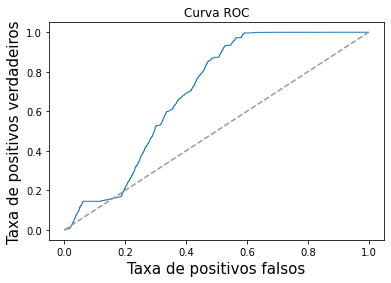

In [158]:
OCSVM_best.fit(X_train)
Y_predicted = OCSVM_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

OCSVM_probs = OCSVM_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, OCSVM_probs)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

In [159]:
print(confusion_matrix(Y_eval,Y_predicted))

[[ 1621  2658]
 [   23 12270]]


O modelo supervisionado apresentou uma melhor performace do que o não supervisionado


**Melhorando o modelo usando DecisionTree**

              precision    recall  f1-score   support

    anormais       0.96      0.88      0.92      4279
     normais       0.96      0.99      0.97     12293

    accuracy                           0.96     16572
   macro avg       0.96      0.93      0.95     16572
weighted avg       0.96      0.96      0.96     16572

Área sob a curva ROC: {:0.3f} 0.9348433142344114


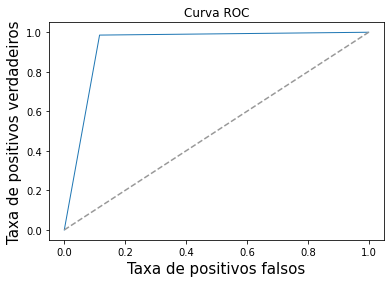

In [160]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_dev, Y_dev)

Y_predicted = decision_tree.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

cv_preds = decision_tree.predict(X_cv)
print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

dt_probs = decision_tree.predict_proba(X_eval)
fpr, tpr, _ = roc_curve(Y_eval, Y_predicted)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

In [161]:
print(confusion_matrix(Y_eval, Y_predicted))

[[ 3783   496]
 [  177 12116]]


**Conclusões**



*   As variáveis mais importantes são o tempo entre o cadastro e a compra, e a quantidade de ip's associdadas a um id
*   As primeiras semanas do ano possuem mais casos de fraude
*   O DecisionTreeClassifier apresentou a melhor performace





**Sugestões**



*   Exigir mais informações do cliente durante o cadastro
*   Aumentar a segurança durante as primeiras três semanas do ano
*   Se identificar uma fraude, pedir para o cliente responder uma pergunta de segurança



